<a href="https://colab.research.google.com/github/cbsobral/ml-fies/blob/main/Module01_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1 - Load Dataset

Here, we import the train set create in Module00_Data. 


In [88]:
import pandas as pd

url_train = "https://drive.google.com/file/d/1FlptrwjNswZyAqjVth57I9cve7nDDbWt/view?usp=sharing"
path_train = "https://drive.google.com/uc?export=download&id="+url_train.split("/")[-2]
train = pd.read_csv(path_train)
train.shape

(496735, 31)

In [60]:
train_set = train.drop("default", axis=1) # drop targets for training set
train_target = train["default"].copy()

In [94]:
url_test = "https://drive.google.com/file/d/1i2KpLbn7c6h2wNHKLYvam68l6cLR6ICR/view?usp=sharing"
path_test = "https://drive.google.com/uc?export=download&id="+url_test.split("/")[-2]
test = pd.read_csv(path_test)
test.shape

(124184, 31)

In [95]:
test_set = test.drop("default", axis=1) # drop targets for test set
test_target = test["default"].copy()

### 2 - Pipeline

The pipeline contains functions that will be used to transform the dataset. For the numeric attributes, we employ XXX.

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
        ("num_imputer", SimpleImputer(strategy="median")),
        ("std_scaler", StandardScaler()),
    ])

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

ord_pipeline = Pipeline([
        ("ord_imputer", SimpleImputer(strategy="most_frequent")),
        ("ord_encoder", OrdinalEncoder()),
    ])

In [63]:
ord_attribs = ['igc','date_contract'] # 2 attributes

num_attribs = ['family_income',   #17
               'personal_income',
               'high_school_endyear',
               'n_sem_course',
               'n_completed_sem',
               'sem_funded',
               'fam_size',
               'income_pc',
               'tuition_current',
               'inc_prop',
               'perc_requested',
               'loan_value_sem',
               'student_resource',
               'loan_value',
               'loan_limit',
               'total_debt',
               'age']
  

cat_attribs = ['semester_enroll',  #9
               'gender',
               'occupation', 
               'marital_status',
               'ethnicity', 
               'public_hs', 
               'state_course', 
               'degree', 
               'contract_phase']

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("ord", ord_pipeline,ord_attribs)
        ])

In [96]:
train_prepared = full_pipeline.fit_transform(train_set)
test_prepared = full_pipeline.fit_transform(test_set)

In [97]:
test_prepared[:1]

<1x505 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [91]:
train_prepared[:1]

<1x568 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

### 3 - Classifiers

For the initial runs, we employ 5 methods: Logistic regression, decision tree, random forest, SVC and ANN. The best result so far was achieved with the ANN -- AUC of XX. 


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logr = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
logr.fit(train_prepared, train_target)
(cross_val_score(logr, train_prepared, train_target, cv=3, scoring="roc_auc")).mean()

In [67]:
from sklearn.tree import DecisionTreeClassifier 

dtc = DecisionTreeClassifier()
dtc = dtc.fit(train_prepared, train_target)
(cross_val_score(dtc, train_prepared, train_target, cv=3, scoring="roc_auc")).mean()

0.6571229277170021

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_prepared, train_target)
(cross_val_score(rf, train_prepared, train_target, cv=3, scoring="roc_auc")).mean()

In [ ]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=1, loss="hinge")
svm_clf.fit(train_prepared, train_target)
(cross_val_score(svm_clf, train_prepared, train_target, cv=3, scoring="roc_auc")).mean()

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(train_prepared, train_target.values.ravel())
(cross_val_score(mlp, train_prepared, train_target, cv=3, scoring="roc_auc")).mean()

### 4 - Visualization

In [98]:
from sklearn.metrics import roc_auc_score

# Predict probabilities
pred_logr = logr.predict_proba(test_prepared)
pred_dtc = dtc.predict_proba(test_prepared)
#pred_rf = rf.predict_proba(test_prepared)

# AUC score
auc_logr = roc_auc_score(test_target, pred_logr[:,1])
auc_dtc = roc_auc_score(test_target, pred_dtc[:,1])
#auc_rf = roc_auc_score(test_target, pred_rf[:,1])

#print(auc_logr, auc_dtc, auc_rf)

ValueError: ignored

In [79]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr_logr, tpr_logr, thresh_logr = roc_curve(test_target, pred_logr[:,1], pos_label=1)
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(test_target, pred_dtc[:,1], pos_label=1)
#fpr_rf, tpr_rf, thresh_rf = roc_curve(test_target, pred_rf[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_target))]
p_fpr, p_tpr, _ = roc_curve(train_target, random_probs, pos_label=1)

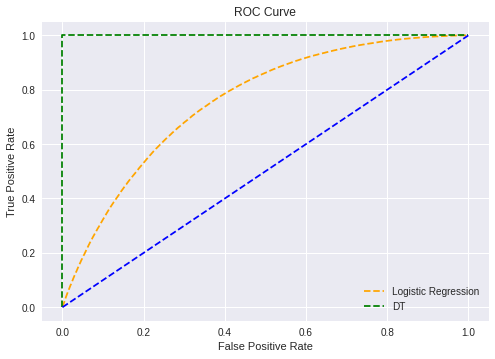

In [99]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_logr, tpr_logr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr_dtc, tpr_dtc, linestyle='--',color='green', label='DT')
#plt.plot(fpr_rf, tpr_rf, linestyle='--',color='pink', label='RF')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC Curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
#from joblib import dump, load
#dump(dtc, 'logr.joblib') 